# **Computer Vision Project**

**PART - C**

**3.1 a - Import Libraries:**

In [1]:
# used to supress display of warnings
import warnings

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

# StanderScaler is a function in Sklearn preprocessing that standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# TensorFlow is a software library for deep learning, a branch of artificial intelligence that uses neural networks with many hidden layers
import tensorflow as tf
# tensorflow.keras is a class in TensorFlow that allows you to create a Sequential model for a plain stack of layers where each layer has exactly one input tensor and one output tensor1.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten

from tensorflow.keras import optimizers

import random
from tensorflow.keras import backend
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log

import os

!pip install opencv-python
import cv2

C:\Users\valkya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**3.1 a - Unzip, read and Load data(‘PINS.zip’)**

In [2]:
# To extract the file from a zip file.
from zipfile import ZipFile

with ZipFile('PINS.zip', 'r') as z:
  z.extractall()

In [3]:
# To store the file in a separate variable
path = "./PINS/"

**3.1 b - Write function to create metadata of the image.**

In [4]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

**3.1 c - Write a loop to iterate through each and every image and create metadata for all the images.**

In [5]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [6]:
# Call load_metadata to read the images and assign metadata to a variable
metadata = load_metadata('PINS')

In [7]:
# Write a function to read image using opencv and convert it from BGR to RGB
def load_image(path):
    img = cv2.imread(path, 1) # OpenCV loads/reads images with color channels
    # To convert the image channels from BGR to RGB 
    return img[...,::-1]

In [8]:
load_image(metadata[0].image_path()) 

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

**3.1 d - Generate Embeddings vectors on the each face in the dataset.**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [10]:
from tensorflow.keras.models import model_from_json
# To create an instance for the model
model = vgg_face()
# To store the learned parameters of a neural network model, which are necessary for making predictions with the model in vgg_face_weights files
model.load_weights('vgg_face_weights.h5')

In [11]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [12]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 4s 4s/step
(2622,)


In [13]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        # scale RGB values to interval [0,1]
        img = cv2.resize(img, dsize = (224,224))
        img = (img / 255.).astype(np.float32)
        # obtain embedding vector for image
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except Exception as e:
        print(str(e))
        print(i,m)

1/1 [==============================] - 1s 618ms/step


1/1 [==============================] - 1s 757ms/step


1/1 [==============================] - 1s 683ms/step


1/1 [==============================] - 1s 742ms/step


1/1 [==============================] - 1s 735ms/step


1/1 [==============================] - 1s 826ms/step


1/1 [==============================] - 1s 831ms/step


1/1 [==============================] - 1s 749ms/step


1/1 [==============================] - 1s 923ms/step


1/1 [==============================] - 1s 720ms/step


1/1 [==============================] - 1s 804ms/step


1/1 [==============================] - 1s 795ms/step


1/1 [==============================] - 1s 871ms/step


1/1 [==============================] - 1s 844ms/step


1/1 [==============================] - 1s 904ms/step


1/1 [==============================] - 1s 739ms/step


1/1 [==============================] - 1s 772ms/step


1/1 [==============================] - 1s 809ms/step


1/1 [==============================] - 1s 963ms/step


1/1 [==============================] - 1s 865ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 908ms/step


1/1 [==============================] - 1s 950ms/step


1/1 [==============================] - 1s 924ms/step


1/1 [==============================] - 1s 900ms/step


1/1 [==============================] - 1s 875ms/step


1/1 [==============================] - 1s 949ms/step


1/1 [==============================] - 1s 888ms/step


1/1 [==============================] - 1s 891ms/step


1/1 [==============================] - 1s 890ms/step


1/1 [==============================] - 1s 826ms/step


1/1 [==============================] - 1s 951ms/step


1/1 [==============================] - 1s 951ms/step


1/1 [==============================] - 1s 843ms/step


1/1 [==============================] - 1s 881ms/step


1/1 [==============================] - 1s 842ms/step


**3.1 e - Build distance metrics for identifying the distance between two similar and dissimilar images.**

In [14]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

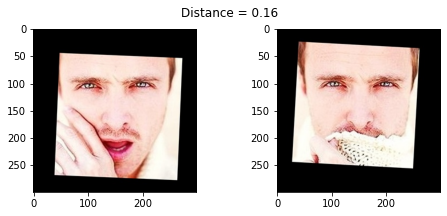

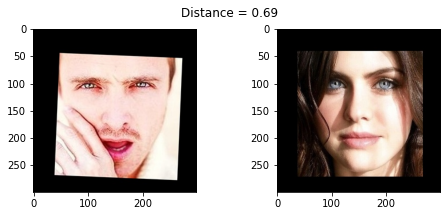

In [15]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

**3.1 f - Use PCA for dimensionality reduction.**

In [16]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Numerical encoding of identities
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [18]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128, svd_solver='randomized', whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

**3.1 g - Build an SVM classifier in order to map each image to its right person.**

In [20]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', class_weight=None , C=10000000, gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9624060150375939

**3.1 h - Import and display the the test images.**

In [21]:
DJ = cv2.imread('Dwayne+Johnson4.jpg')
BC = cv2.imread('Benedict+Cumberbatch9.jpg')

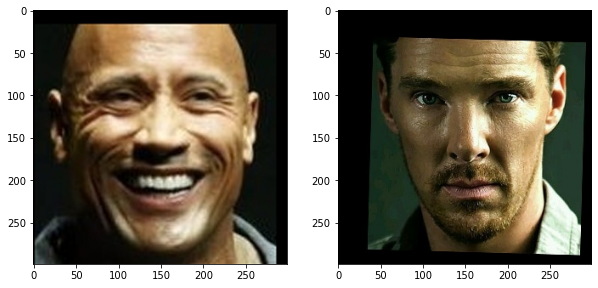

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(DJ[...,::-1])
plt.subplot(122)
plt.imshow(BC[...,::-1])

**3.1 i - Use the trained SVM model to predict the face on both test images.**

In [23]:
img = load_image('Dwayne+Johnson4.jpg')
img = cv2.resize(img, dsize = (224,224))
img = (img / 255.).astype(np.float32)

In [24]:
def preprocess_test_img(path_to_img):
    orig_img = load_image(path_to_img)
    img = cv2.resize(orig_img, dsize = (224,224))
    img = (img / 255.).astype(np.float32)
    img = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    img = np.expand_dims(img,0)
    img = sc.transform(img)
    img = pca.transform(img)
    return orig_img,img

1/1 [==============================] - 2s 2s/step


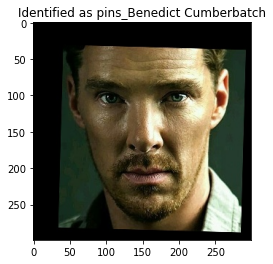

In [25]:
orig_img, test_img = preprocess_test_img('Benedict+Cumberbatch9.jpg')
pred = clf.predict(test_img) # Using SVM Classifier predicting the test image(s).
retrieve_label = encoder.inverse_transform(pred)[0] # To retrieve the original label(s) for the predicted class label(s).
plt.imshow(orig_img)
plt.title(f'Identified as {retrieve_label}');

1/1 [==============================] - 2s 2s/step


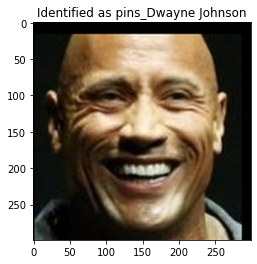

In [26]:
orig_img, test_img = preprocess_test_img('Dwayne+Johnson4.jpg')
pred = clf.predict(test_img)
retrieve_label = encoder.inverse_transform(pred)[0] # To retrieve the original label(s) for the predicted class label(s).
plt.imshow(orig_img)
plt.title(f'Identified as {retrieve_label}');